# Import

In [1]:
import matplotlib.pyplot as plt
import json
import os
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize


# Traitement Image pour faire du gradiant

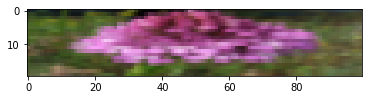

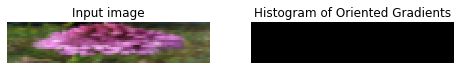

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage.feature import hog
from skimage import data, exposure

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean


#Récupération de l'image
image = mpimg.imread(os.getcwd()+"/train/281.jpg")

#Transformaation de l'image dans un format utilisable
if image.dtype == np.float32: # Si le résultat n'est pas un tableau d'entiers
    image = (image * 255).astype(np.uint8)
    
image = resize(image, (20,100),
                       anti_aliasing=True)

#Affichage Image
plt.imshow(image)
#plt.show()

#Début traitement pour avoir les gradiant
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(32, 32),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()




Définition de la fonction donnant l histogramme des gradiants

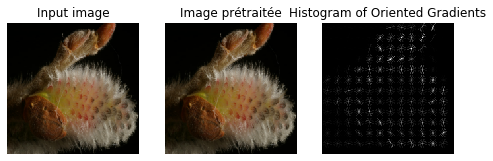

In [4]:

# import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from skimage.feature import hog
from skimage import data, exposure
from PIL import Image

import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean


def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def pretraitement(image):
    #Reduction de l'image 
    image=resize(image,(200,200));

    #Transformaation de l'image dans un format utilisable
    if image.dtype == np.float32: # Si le résultat n'est pas un tableau d'entiers
        image = (image * 255).astype(np.uint8)
    #Image en noir et blanc
    #image=rgb2gray(image);
    return image;

def transformeGradiant(nomImage):
    #Récupération de l'image
    image = mpimg.imread(os.getcwd()+"/train/"+nomImage)
    
    #Prétraitement des images
    image=pretraitement(image)

    #Sauvegarde nouvelle image
    #mpimg.imsave(os.getcwd()+"/Descente_Gradiant/trainResize/"+nomImage, image)

    #Début traitement pour avoir les gradiant
    fd = hog(image, orientations=8, pixels_per_cell=(16,16),
                    cells_per_block=(5, 5),feature_vector=True)
    return fd;

def transformeGradiantEnImage(nomImage):
    #Récupération de l'image
    image = mpimg.imread(os.getcwd()+"/train/"+nomImage)
    
    #Prétraitement des images
    image=pretraitement(image);
    
    #Début traitement pour avoir les gradiant
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16,16),
                    cells_per_block=(5, 5), visualize=True)


    hog_image = resize(hog_image, (200,200),
                       anti_aliasing=True)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return hog_image;

def afficherFleurEtGradiant(nomImage,hog_image):
    image = mpimg.imread(os.getcwd()+"/Descente_Gradiant/trainResize/"+nomImage)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input image')

    # Rescale histogram for better display
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    ax2.axis('off')
    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients')
    plt.show();

    
    
imgTest=transformeGradiant("23.jpg")
imgTest2=transformeGradiantEnImage("23.jpg")

fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(8, 4), sharex=True, sharey=True)

im=resize(mpimg.imread(os.getcwd()+"/train/23.jpg"),(200,200))

ax1.axis('off')

ax1.imshow(im, cmap=plt.cm.gray)
ax1.set_title('Input image')

ax2.axis('off')
ax2.imshow(pretraitement(im), cmap=plt.cm.gray)
ax2.set_title('Image prétraitée')

# Rescale histogram for better display
#hog_image_rescaled = exposure.rescale_intensity(imgTest, in_range=(0, 10))

ax3.axis('off')
ax3.imshow(imgTest2, cmap=plt.cm.gray)
ax3.set_title('Histogram of Oriented Gradients')
plt.show()

Resize Nécessaire sinon ca plante

# Création listes pour le classifieur 

In [5]:
def creationDicoSpecies():
    chemin = os.getcwd()+"/train/";
    dico={}
    files = os.listdir(chemin);
    i=0;
    for file in files:
        if file.endswith('.json') and i<3000:
            openFile = open(chemin+file, "r");
            fileSansExt=file.split(".");
            espece=json.loads(openFile.read())["Image"]["Species"];
            openFile.close();
            dico[fileSansExt[0]]=espece;
            i=i+1;
    return dico;

In [6]:

#Création d'un dico clé:fichier JSON valeur: Nom espece
dicoSpe=creationDicoSpecies();
#display(dicoSpe);
#Création liste

#Creation des listes de train pour le classifieur
ListGrad=[];
ListEspece=[];

i=0;
for clé in dicoSpe:
    fd=transformeGradiant(clé+".jpg");
    #if i<10:
    #    print(clé+".jpg",fd);
    #    i=i+1;
    #print(i , " : " , clé);
    ListGrad.append(fd);
    ListEspece.append(dicoSpe[clé])
    

#afficherFleurEtGradiant("23.jpg",df['Gradiant'].get(1));
print("Images traitées")

Images traitées


# Début Classifieurs

In [7]:
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#array[:,0:len(df.columns)-1] 
X =np.asarray(ListGrad);
y = np.asarray(ListEspece);
validation_size=0.66 #33% du jeu de données pour le test

#Séparation des données en donnée d'apprentissage(60%), de test(20%) et de validation(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size=0.25)

#Test classifieur GaussianNB
clf = GaussianNB()

clf.fit(X_train, y_train)

result = clf.predict(X_test)
#print (result)

print ('accuracy: ',accuracy_score(result, y_test))

conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)

print ('\n',classification_report(y_test, result))



accuracy:  0.17

 matrice de confusion 
 [[3 2 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 1 0 ... 0 0 1]]

                                                          precision    recall  f1-score   support

                                Achillea millefolium L.       0.43      0.14      0.21        22
                                   Aconitum napellus L.       0.08      0.17      0.11        12
Anacamptis morio (L.) R.M.Bateman, Pridgeon & M.W.Chase       0.50      0.09      0.15        11
                      Anacamptis pyramidalis (L.) Rich.       0.17      0.10      0.12        20
                                      Anemone alpina L.       0.29      0.18      0.22        11
                                    Anemone hepatica L.       0.14      0.14      0.14         7
                                    Anemone nemorosa L.       0.00      0.00      0.00         7
                                  Aquilegia vulgaris L.     

/home/thomas/Bureau/Reconnaissance-visuel-de-plante/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.181 taille 150 150
0.16 taille 180 180
0.186 taile 190 190
0.186 taille 200 200
0.16 taille 250 250
0.165 taille 300 300


Avec couleur est a peine mieux que sans couleur .

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB


X =np.asarray(ListGrad);
y = np.asarray(ListEspece);

scoring = 'accuracy'
models =[]
#models.append(('KNN', KNeighborsClassifier())) #nul : long pour 0.08

models.append(('GaussianNB', GaussianNB())) #rapide pour 0.19
models.append(('MultinomialNB', MultinomialNB()))#rapide pour 16%
#models.append(('BernoulliNB', BernoulliNB()))#rapide pour 4% normal c'est pour les booleans
models.append(('ComplementNB', ComplementNB()))#rapide pour 12%

#models.append(('SGDClassifier', SGDClassifier()))#long pour 15%
#models.append(('LinearSVC', LinearSVC()))#



results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=15, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    #pour avoir les paramètres utilisés dans le modèle enlever commentaire ligne suivante
    #print (model.get_params())
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)




GaussianNB: 0.197667 (0.030652)
MultinomialNB: 0.156333 (0.029409)
ComplementNB: 0.122000 (0.022420)


[Text(0, 0, 'GaussianNB'),
 Text(0, 0, 'MultinomialNB'),
 Text(0, 0, 'ComplementNB')]

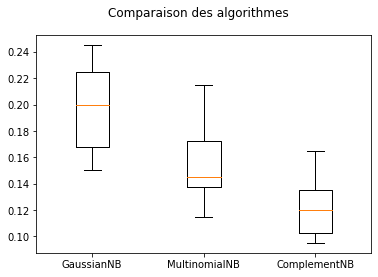

In [10]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf = GaussianNB()
clf.fit(X_train, y_train)
result = clf.predict(X_test)
print('\n accuracy: ', accuracy_score(result, y_test),'\n')

conf = confusion_matrix(y_test, result)
print ('\n matrice de confusion \n',conf)
print ('\n',classification_report(y_test, result))



 accuracy:  0.17 


 matrice de confusion 
 [[3 2 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 2 0]
 [0 1 0 ... 0 0 1]]

                                                          precision    recall  f1-score   support

                                Achillea millefolium L.       0.43      0.14      0.21        22
                                   Aconitum napellus L.       0.08      0.17      0.11        12
Anacamptis morio (L.) R.M.Bateman, Pridgeon & M.W.Chase       0.50      0.09      0.15        11
                      Anacamptis pyramidalis (L.) Rich.       0.17      0.10      0.12        20
                                      Anemone alpina L.       0.29      0.18      0.22        11
                                    Anemone hepatica L.       0.14      0.14      0.14         7
                                    Anemone nemorosa L.       0.00      0.00      0.00         7
                                  Aquilegia vulgaris L. 

/home/thomas/Bureau/Reconnaissance-visuel-de-plante/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:

classifiers = {
    'GaussianNB': GaussianNB(),
    'MultinomialNB':MultinomialNB(),
    'ComplementNB': ComplementNB()
}

params = {'MultinomialNB':[{'fit_prior': [True,False]},
                            {'alpha':[1.0]}
                          ],
          'GaussianNB': [{}],
          'ComplementNB': [{'norm':[True,False]}]
           }

In [18]:
import torch


class Result:
     def __init__(self,name, score, parameters):
         self.name = name
         self.score = score
         self.parameters = parameters
     def __repr__(self):
         return repr((self.name, self.score, self.parameters))

       
results = []
names=[]
for key,value in classifiers.items():
    gd_sr = GridSearchCV(estimator=value,  
                     param_grid=params[key],
                     scoring='accuracy',
                     cv=5,
                     n_jobs=1,
                     iid=True)
    gd_sr.fit(X_train, y_train)  
    result=Result(key,gd_sr.best_score_,gd_sr.best_estimator_)
    results.append(result)   
    names.append("sdf")
    
    
    
results=sorted(results, key=lambda result: result.score, reverse=True) 

print ('Le meilleur resultat : \n')
print ('Classifier : ',results[0].name, 
       ' score %0.2f' %results[0].score, 
       ' avec ',results[0].parameters,'\n')

print ('Tous les résultats : \n')
for result in results:
    print ('Classifier : ',result.name, 
           ' score %0.2f' %result.score, 
           ' avec ',result.parameters,'\n')

    
# On enregistre le modèle
#PATH = './bestModel.pth'
#torch.save(gd_sr.best_estimator_, PATH)

Le meilleur resultat : 

Classifier :  GaussianNB  score 0.18  avec  GaussianNB(priors=None, var_smoothing=1e-09) 

Tous les résultats : 

Classifier :  GaussianNB  score 0.18  avec  GaussianNB(priors=None, var_smoothing=1e-09) 

Classifier :  MultinomialNB  score 0.14  avec  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=False) 

Classifier :  ComplementNB  score 0.12  avec  ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False) 



# Validation

In [12]:
PATH = 'bestModel.pth'
our_model = torch.load(PATH)

result = clf.predict(X_val)
print('\n accuracy: ', accuracy_score(result, y_val),'\n')
conf = confusion_matrix(y_val, result)
print ('\n matrice de confusion \n',conf)
print ('\n',classification_report(y_val, result))



 accuracy:  0.18833333333333332 


 matrice de confusion 
 [[3 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 1 0 1]]

                                                          precision    recall  f1-score   support

                                Achillea millefolium L.       0.43      0.21      0.29        14
                                   Aconitum napellus L.       0.00      0.00      0.00         8
Anacamptis morio (L.) R.M.Bateman, Pridgeon & M.W.Chase       1.00      0.08      0.14        13
                      Anacamptis pyramidalis (L.) Rich.       0.00      0.00      0.00        14
                                      Anemone alpina L.       0.14      0.14      0.14         7
                                    Anemone hepatica L.       0.33      0.17      0.22         6
                                    Anemone nemorosa L.       0.00      0.00      0.00         6
                                  Aquileg

/home/thomas/Bureau/Reconnaissance-visuel-de-plante/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



# Affichage 

In [65]:
#Recupération des classes

def metrique(path):
    files = os.listdir(path);
    contenu = [];
    for file in files:
        if file.endswith('.json'):
            openFile = open(path+file, "r");
            contenu.append(json.loads(openFile.read())["Image"]);
            openFile.close();
    return contenu;

chemin=os.getcwd()+"/small_dataset_train/train/"
contenu = metrique(chemin);
df = pd.DataFrame(contenu)
# on laisse Species car c'est égale au nombre de classe
df.drop(["Genus","ClassId","Family","Vote","Location","Latitude","Longitude","Date","Author","Content","MediaId", "LearnTag", "ImageId2014","ObservationId2014","YearInCLEF","ObservationId"], axis='columns', inplace=True)
df = df.drop_duplicates()
classe  = df.to_numpy();

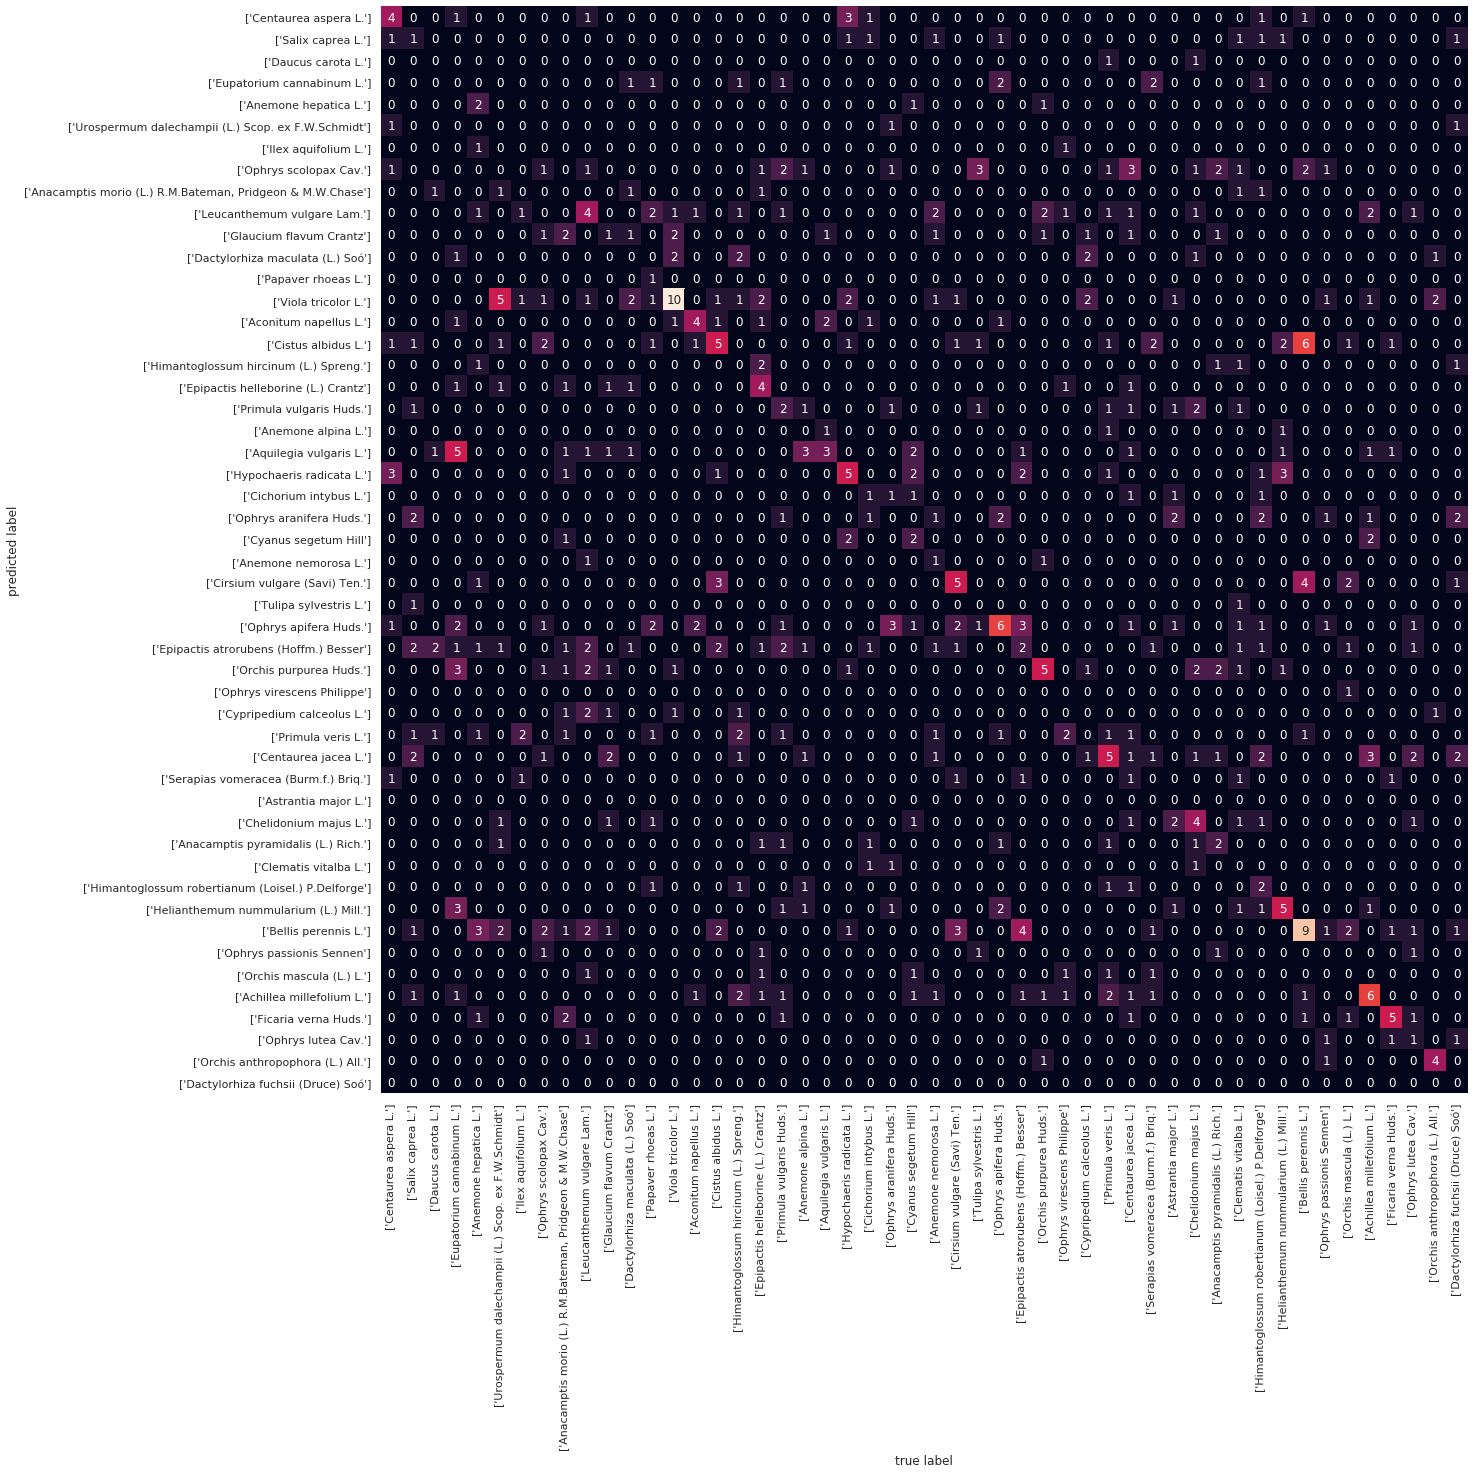

In [66]:
import seaborn as sns; sns.set()


plt.figure(figsize=(20,20))
sns.heatmap(conf.T, square=True, annot=True, fmt='d', cbar=False, xticklabels= classe, yticklabels= classe)

b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t)

plt.xlabel('true label')
plt.ylabel('predicted label');
